# Parcial I - Métodos Computacionales

**2025-1**

---

Nombre: Juan Jose Bustamante Guiral

Identificación: 1023627361

---

* ⚠ Explique su código usando con comentarios,

* ❗Todas las funciones deben tener documentación básica,

* 🛑 El uso de IA's no está permitido,

* ⚛ La interpretación del enunciado hace parte de la evaluación,

* ⏲ Este parcial tiene una duración de 2 horas

In [4]:
# Librerias útiles
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import factorial
from scipy.optimize import root_scalar, newton, bisect # Funciones para raices

## Ayudas
# np.sign (Signo de una variable)
# np.deg2rad (Convertir grados a radianes)
# pd.Dataframe Genera un dataframe a partir de un diccionario o listas
# range(0, 10, 2) (Pasos de 2 comenzando en 0 hasta 10)

# 1

**(40 puntos)** El **método de Ridder** es un algoritmo de búsqueda de raíces que, como la bisección, requiere un intervalo $[a, b]$ tal que $f(a) \cdot f(b) < 0$. A diferencia de la bisección, Ridder introduce una corrección exponencial para acelerar la convergencia, logrando **convergencia cuadrática** sin requerir derivadas.

---
### Pasos para implementar

1. **Definir la función** $f(x)$ y un intervalo $[a, b]$ tal que:

   - $f(a) \cdot f(b) < 0$ (la función tiene signos opuestos en los extremos del intervalo).
   - La función debe ser continua en $[a, b]$.

2. **Calcular el punto medio**:

   $$
   m = \frac{a + b}{2}
   $$

3. **Calcular la corrección exponencial**:

   - Evaluar $f(a)$, $f(b)$ y $f(m)$.
   - Calcular:

     $$
     s = \sqrt{f(m)^2 - f(a) f(b)}
     $$

   - Si $s = 0$, detener: la raíz no puede estimarse en esta iteración.

   - Calcular el nuevo candidato a raíz:

     $$
     x = m + \frac{(m - a) f(m)}{s} \cdot \text{sign}(f(a) - f(b))
     $$

4. **Evaluar $f(x)$** y actualizar el intervalo:

   - Si $f(m) \cdot f(x) < 0$, entonces la nueva raíz está entre $m$ y $x$.
   - Si $f(a) \cdot f(x) < 0$, entonces actualizar $b = x$, luego $f(b) = f(x)$.
   - Si $f(b) \cdot f(x) < 0$, entonces actualizar $a = x$, luego $f(a) = f(x)$.
   - En cada paso mantener la condición $f(a) \cdot f(b) < 0$.

5. **Criterio de parada**:

   - Repetir los pasos anteriores hasta que se alcance la tolerancia deseada:

     $$
     |f(x)| < \varepsilon \quad \text{o} \quad |b - a| < \delta
     $$

   donde $\varepsilon$ y $\delta$ son tolerancias establecidas por el usuario.

---

* Defina una función llamada `Ridder` que calcule la raiz de una función dada. Su función debe tener documentación y retornar el valor de la raiz junto con el número de iteraciones empleadas para alcanzar la convergencia dada una tolerancia.

* Usando
$$\cos(x) = x,$$

Grafique la función para $0\leq x \leq \pi/2$ usando 100 puntos. Luego, cree un DataFrame con los datos de $x$ y $f(x)$, y encuentre una primera aproximación a la raiz aplicando un filtro en el dataframe con los valores más cercanos a cero.

* Usando el método de Ridder encuentre la raiz númericamente y compare su resultado usando el método de bisección y secante.

* Para las siguientes tolerancias (ver código) realice un gráfico usando escala logaritimica en $y$ de cuantas iteraciones son necesarias hasta alcanzar la convergencia. ¿Qué puede concluir acerca de la misma?

```python
# Tolerancias
tol = np.logspace(-1, -20, 20)

# Grafico semilog

plt.semilogy(N, tol)

```

In [5]:
def cos(x):
    return np.cos(x) - x

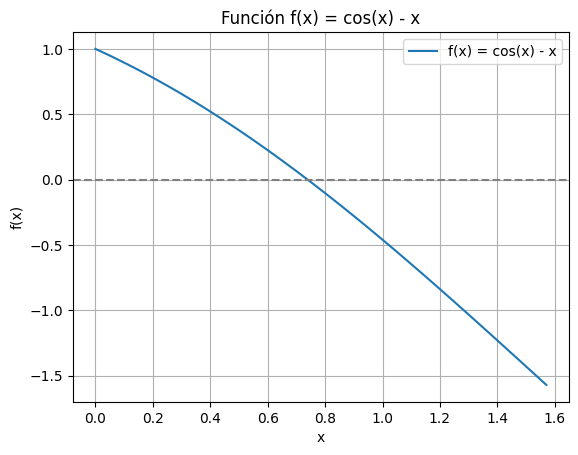

           x      f(x)
43  0.682265  0.093881
44  0.698132  0.067913
45  0.713998  0.041751
46  0.729865  0.015399
47  0.745732 -0.011140
48  0.761598 -0.037864
49  0.777465 -0.064771
50  0.793331 -0.091857


In [34]:
def Ridder(f, a, b, tol=1e-8, max_iter=100):
    '''
    Método de Ridder para encontrar la raíz de una función continua en el intervalo [a, b].

    Parámetros:
    f es función continua.
    a, b es el intervalo
    tol la tolerancia
    Retorna la raiz La raíz y el número de iteraciones realizadas.
    '''
    fa = f(a)
    fb = f(b)
    if fa * fb >= 0:
        raise ValueError('La función debe tener signos opuestos en los extremos del intervalo')

    for i in range(max_iter + 1):
        m = (a + b)/2
        fm = f(m)
        s = np.sqrt(fm**2 - fa * fb)
        if s == 0:
            raise ValueError('La raíz no puede estimarse en esta iteración.')

        x = m + (((m - a) * fm )/ s) * (np.sign(fa - fb))
        fx = f(x)
        if abs(fx) < tol or abs(b - a) < tol:
            return x,i
        if fm * fx < 0:
            a, b = m, x
            fa, fb = fm, fx
        elif fa * fx < 0:
            b, fb = x, fx
        else:
            a, fa = x, fx
    return x, max_iter

x = np.linspace(0, np.pi / 2, 100)
y = cos(x)

plt.plot(x, y, label='f(x) = cos(x) - x')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Función f(x) = cos(x) - x')
plt.legend()
plt.grid()
plt.show()

df = pd.DataFrame({'x': x, 'f(x)': y})
print(df[(df["f(x)"]<0.1)&(df["f(x)"]> -0.1)])


In [35]:
Ridder(cos, 0, np.pi/2)

(np.float64(0.7390851332098146), 2)

In [36]:
bisect(cos,0,np.pi/2)

0.7390851332152737

In [38]:
root_scalar(cos, method='secant', x0=0, x1=np.pi/2)

      converged: True
           flag: converged
 function_calls: 7
     iterations: 6
           root: 0.7390851332151607
         method: secant

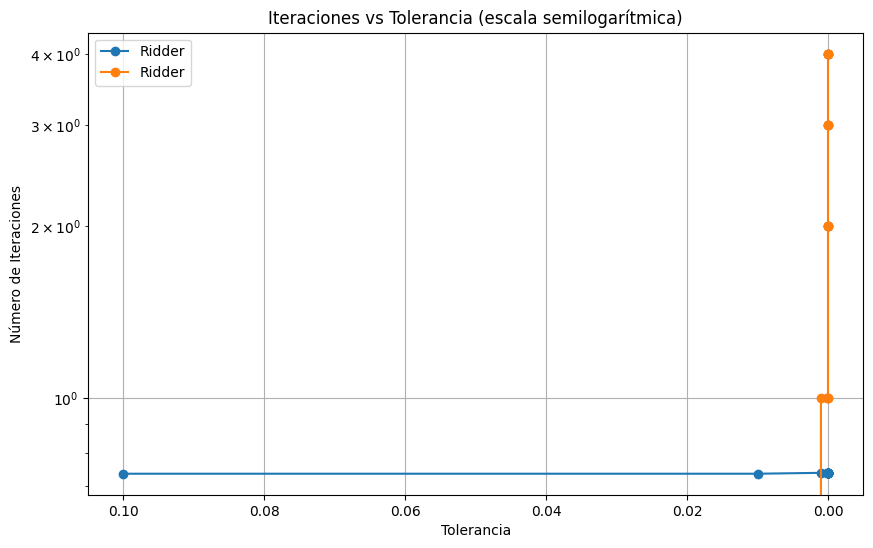

In [45]:
tolerancias = np.logspace(-1, -20, 20)
ridder_N= []

for tol in tolerancias:
    n_ridder = Ridder(cos, 0, np.pi/2, tol=tol)
    ridder_N.append(n_ridder)

# Graficar
plt.figure(figsize=(10, 6))
plt.semilogy(tolerancias, ridder_N, label='Ridder', marker='o')
plt.xlabel('Tolerancia')
plt.ylabel('Número de Iteraciones')
plt.title('Iteraciones vs Tolerancia (escala semilogarítmica)')
plt.legend()
plt.grid()
plt.gca().invert_xaxis()  # Para que tol más pequeño esté a la derecha
plt.show()


#2

**(60 puntos)** En óptica, cuando un rayo de luz atraviesa la interfaz entre dos medios con diferentes índices de refracción, su dirección cambia según la ley de Snell. Para el caso de un prisma triangular, cuando un rayo emerge después de dos refracciones, el ángulo de desviación total $\delta$ está dado por:

$$\delta(\theta_i) = \theta_i + \arcsin\left(n\sin\left(A - \arcsin\left(\frac{\sin\theta_i}{n}\right)\right)\right) - A$$

donde $\theta_i$ es el ángulo de incidencia, $n$ es el índice de refracción del prisma y $A$ es el ángulo del prisma.

La derivada de esta función con respecto al ángulo de incidencia $\theta_i$ es:

$$\frac{d\delta}{d\theta_i} = 1 - \frac{\cos\theta_i \cdot \cos(A-\theta_r)}{\cos\theta_r \cdot \sqrt{1-n^2\sin^2(A-\theta_r)}}$$

donde $\theta_r = \arcsin\left(\frac{\sin\theta_i}{n}\right)$ es el ángulo de refracción en la primera interfaz.

Considere un prisma de vidrio crown con $n = 1.52$ y $A = 60°$.

### Parte A:
* Escriba una función explicita y documentada para $\frac{d\delta}{d\theta_i}$

* Realice un gráfico para $\frac{d\delta}{d\theta_i}$ y encuentre el ángulo de incidencia $\theta_i$ que produce el ángulo de desviación mínimo para $\theta_i \in [30°, 80°]$.

* Use el método de Newton-Raphson (sin derivada) y el método de la secante para hallar el ángulo de desviación mínimo.


### Parte B:
* Determine el ángulo crítico $\theta_c$ para el cual el rayo comienza a experimentar reflexión interna total en la segunda interfaz del prisma. Esta condición ocurre cuando:

$$\sin(A - \theta_r) = \frac{1}{n}$$

* Resuelva numéricamente la ecuación anterior para encontrar el ángulo de incidencia $\theta_i$ correspondiente a este ángulo crítico, utilizando el método de la bisección.





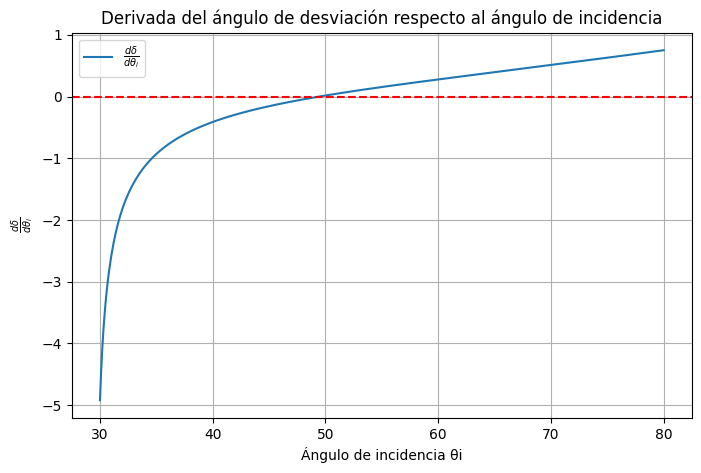

In [68]:
n = 1.52
A = np.deg2rad(60)

def dtheta(theta_i):
    '''
    Calcula la derivada dδ/dθ_i para un ángulo de incidencia theta_i (en radianes).

    Parámetros:
    theta_i : Ángulo de incidencia en radianes.

    Retorna:
    derivada
    '''
    theta_r = np.arcsin(np.sin(theta_i) / n)
    derivada = 1 - (np.cos(theta_i) * np.cos(A - theta_r)) / (np.cos(theta_r) * np.sqrt(1 - (n**2) * (np.sin(A - theta_r))**2))

    return derivada
# Rango de theta_i en grados y luego a radianes
theta_i_grados = np.linspace(30, 80, 500)
theta_i_rad = np.radians(theta_i_grados)

# Evaluar la derivada
derivada = dtheta(theta_i_rad)

# Graficar
plt.figure(figsize=(8,5))
plt.plot(theta_i_grados, derivada, label=r"$\frac{d\delta}{d\theta_i}$")
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Ángulo de incidencia θi")
plt.ylabel(r"$\frac{d\delta}{d\theta_i}$")
plt.title("Derivada del ángulo de desviación respecto al ángulo de incidencia")
plt.legend()
plt.grid()
plt.show()

In [99]:
newton(dtheta, x0=np.deg2rad(30), fprime=None)

np.float64(0.8633131150155535)

In [70]:
root_scalar(dtheta, method='secant', x0=np.deg2rad(30), x1=np.deg2rad(80))

      converged: True
           flag: converged
 function_calls: 9
     iterations: 8
           root: 0.8633131150155537
         method: secant

In [96]:
def critico(theta_i):
    return np.sin(A - (np.arcsin(np.sin(theta_i)) / n)) - 1/n

In [97]:
bisect(critico, np.deg2rad(20), np.deg2rad(40))

0.5003500155331714

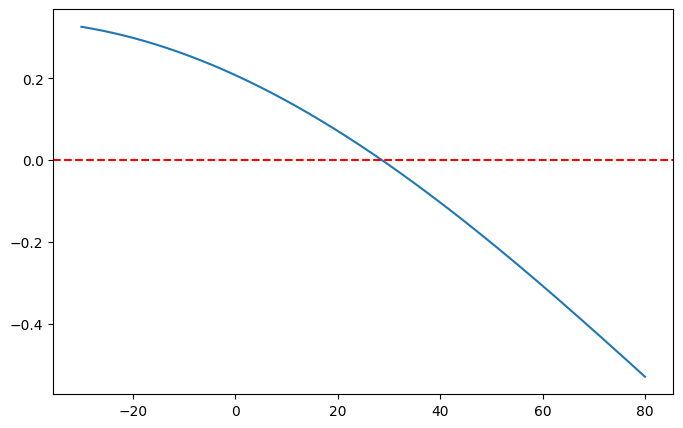

In [94]:
angulos = critico(theta_g_rad)

plt.figure(figsize=(8, 5))
plt.plot(theta_g_grados, angulos)
plt.axhline(0, color='red', linestyle='--')
